<a href="https://colab.research.google.com/github/andhikaaria/MachineLearning/blob/main/mgg5/EDA_House_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Andhika Aria Pratama Nugraha
#1103202121
#Tugas ke mgg5


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor



In [2]:
from google.colab import drive  # Mengimpor modul yang diperlukan untuk mengakses Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
#Membaca file dan mengubah ke dataframe
file_path = '/content/drive/My Drive/Dataset/kc_house_data.csv'
house = pd.read_csv(file_path)
house.head()


id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7      1180.0              0   
1      7242     2.0           0     0  ...      7      2170.0            400   
2     10000     1.0           0     0  ...      6       770.0              0   
3      5000     1.0           0     0  ...      7      1050.0            910   
4      8080     1.0           0     0  ...      8      1680.0              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [4]:
# Menghitung jumlah nilai unik dalam setiap kolom (axis=0) pada DataFrame house
print(house.nunique(axis=0))

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64


In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
house['date'] = pd.to_datetime(house['date'])

In [7]:
# Menambahkan kolom 'month' ke DataFrame house yang berisi bulan dari tanggal 'date'
house['month'] = house['date'].apply(lambda date: date.month)

# Menambahkan kolom 'year' ke DataFrame house yang berisi tahun dari tanggal 'date'
house['year'] = house['date'].apply(lambda date: date.year)


In [8]:
# Menghapus kolom 'id' dari DataFrame house
house.drop('id', inplace=True, axis=1)

# Menghapus kolom 'date' dari DataFrame house
house.drop('date', inplace=True, axis=1)


In [9]:
# Menghitung jumlah nilai null (NaN) dalam setiap kolom DataFrame house
house.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
month            0
year             0
dtype: int64

In [10]:
# Menghitung nilai rata-rata dari kolom 'sqft_above'
mean_sqft_above = house['sqft_above'].mean()

# Mengisi nilai null (NaN) dalam kolom 'sqft_above' dengan nilai rata-rata
house['sqft_above'].fillna(mean_sqft_above, inplace=True)

In [11]:
# Menghitung jumlah nilai null (NaN) dalam setiap kolom DataFrame house
house.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
month            0
year             0
dtype: int64

In [12]:
house.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318      0.650743      1.175459   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

       ...  sqft_basement      yr_built  yr_renovated       zipcode  \
count  ...   21613.000000  21613.000000  21613.000000  21613.000000   
mean   ...     291.509045   1971.005136     84.402258  98077.939805   
std    ...     442.575043     29.373411    401.679240     53.505026   
min    ...       0.000000   1900.000000      0.000000  98001.000000   
25%    ...       0.000000   1951.000000      0.000000  98033.000000   
50%    ...       0.000000   1975.000000      0.000000  98065.000000   
75%    ...     560.000000   1997.000000      0.000000  98118.000000   
max    ...    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15         month  \
count  21613.000000  21613.000000   21613.000000   21613.000000  21613.000000   
mean      47.560053   -122.213896    1986.552492   12768.455652      6.574423   
std        0.138564      0.140828     685.391304   27304.179631      3.115308   
min       47.155900   -122.519000     399.000000     651.000000      1.000000   
25%       47.471000   -122.328000    1490.000000    5100.000000      4.000000   
50%       47.571800   -122.230000    1840.000000    7620.000000      6.000000   
75%       47.678000   -122.125000    2360.000000   10083.000000      9.000000   
max       47.777600   -121.315000    6210.000000  871200.000000     12.000000   

               year  
count  21613.000000  
mean    2014.322954  
std        0.467616  
min     2014.000000  
25%     2014.000000  
50%     2014.000000  
75%     2015.000000  
max     2015.000000  

[8 rows x 21 columns]

In [13]:
# Menghitung jumlah nilai 0 dalam kolom 'bedrooms' dan 'bathrooms'
bedrooms = (house.bedrooms == 0).sum()
bathrooms = (house.bathrooms == 0).sum()

# Mencetak hasil perhitungan jumlah nilai 0
print("Nilai 0 di kolom bedrooms ada: ", bedrooms)
print("Nilai 0 di kolom bathrooms: ", bathrooms)


Nilai 0 di kolom bedrooms ada:  13
Nilai 0 di kolom bathrooms:  10


In [14]:
# Mengidentifikasi dan mengambil baris dengan jumlah kamar mandi (bathrooms) yang sama dengan 0
house.loc[(house['bathrooms']==0)]

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
875    1095000.0         0        0.0         3064      4764     3.5   
1149     75000.0         1        0.0          670     43377     1.0   
3119    380000.0         0        0.0         1470       979     3.0   
5832    280000.0         1        0.0          600     24501     1.0   
6994   1295650.0         0        0.0         4810     28008     2.0   
9773    355000.0         0        0.0         2460      8049     2.0   
9854    235000.0         0        0.0         1470      4800     2.0   
10481   484000.0         1        0.0          690     23244     1.0   
14423   139950.0         0        0.0          844      4269     1.0   
19452   142000.0         0        0.0          290     20875     1.0   

       waterfront  view  condition  grade  ...  sqft_basement  yr_built  \
875             0     2          3      7  ...              0      1990   
1149            0     0          3      3  ...              0      1966   
3119            0     2          3      8  ...              0      2006   
5832            0     0          2      3  ...              0      1950   
6994            0     0          3     12  ...              0      1990   
9773            0     0          3      8  ...              0      1990   
9854            0     0          3      7  ...              0      1996   
10481           0     0          4      7  ...              0      1948   
14423           0     0          4      7  ...              0      1913   
19452           0     0          1      1  ...              0      1963   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
875               0    98102  47.6362 -122.322           2360        4000   
1149              0    98022  47.2638 -121.906           1160       42882   
3119              0    98133  47.7145 -122.356           1470        1399   
5832              0    98045  47.5316 -121.749            990       22549   
6994              0    98053  47.6642 -122.069           4740       35061   
9773              0    98031  47.4095 -122.168           2520        8050   
9854              0    98065  47.5265 -121.828           1060        7200   
10481             0    98053  47.6429 -121.955           1690       19290   
14423             0    98001  47.2781 -122.250           1380        9600   
19452             0    98024  47.5308 -121.888           1620       22850   

       month  year  
875        6  2014  
1149       2  2015  
3119       2  2015  
5832      11  2014  
6994       6  2014  
9773       4  2015  
9854      12  2014  
10481      9  2014  
14423      4  2015  
19452      9  2014  

[10 rows x 21 columns]

In [15]:
# Menghapus baris dengan nilai 0 pada kolom 'bedrooms' dan 'bathrooms'
house = house.loc[(house[['bedrooms','bathrooms']]!=0).all(axis=1)]

In [16]:
house.shape

(21597, 21)

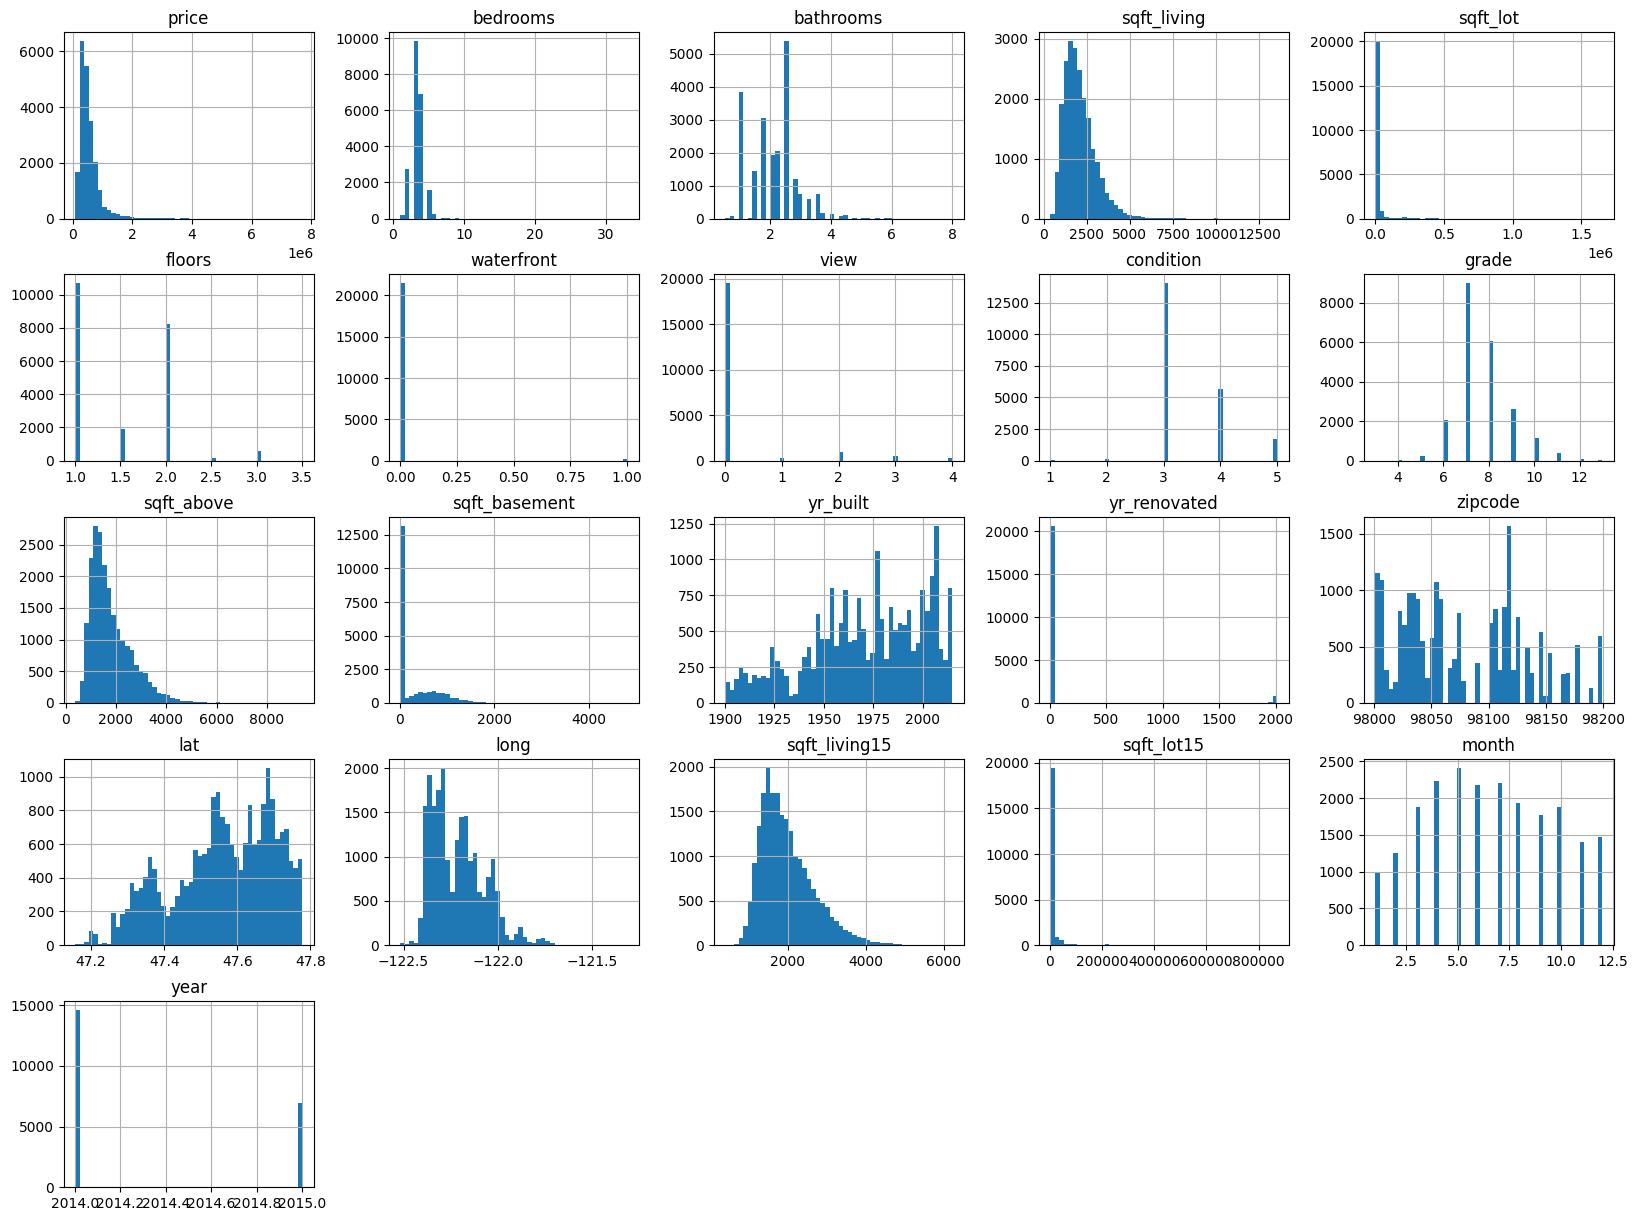

In [17]:
# Menggambar histogram untuk masing-masing kolom dalam DataFrame 'house'
house.hist(bins=50, figsize=(20,15))
plt.show()

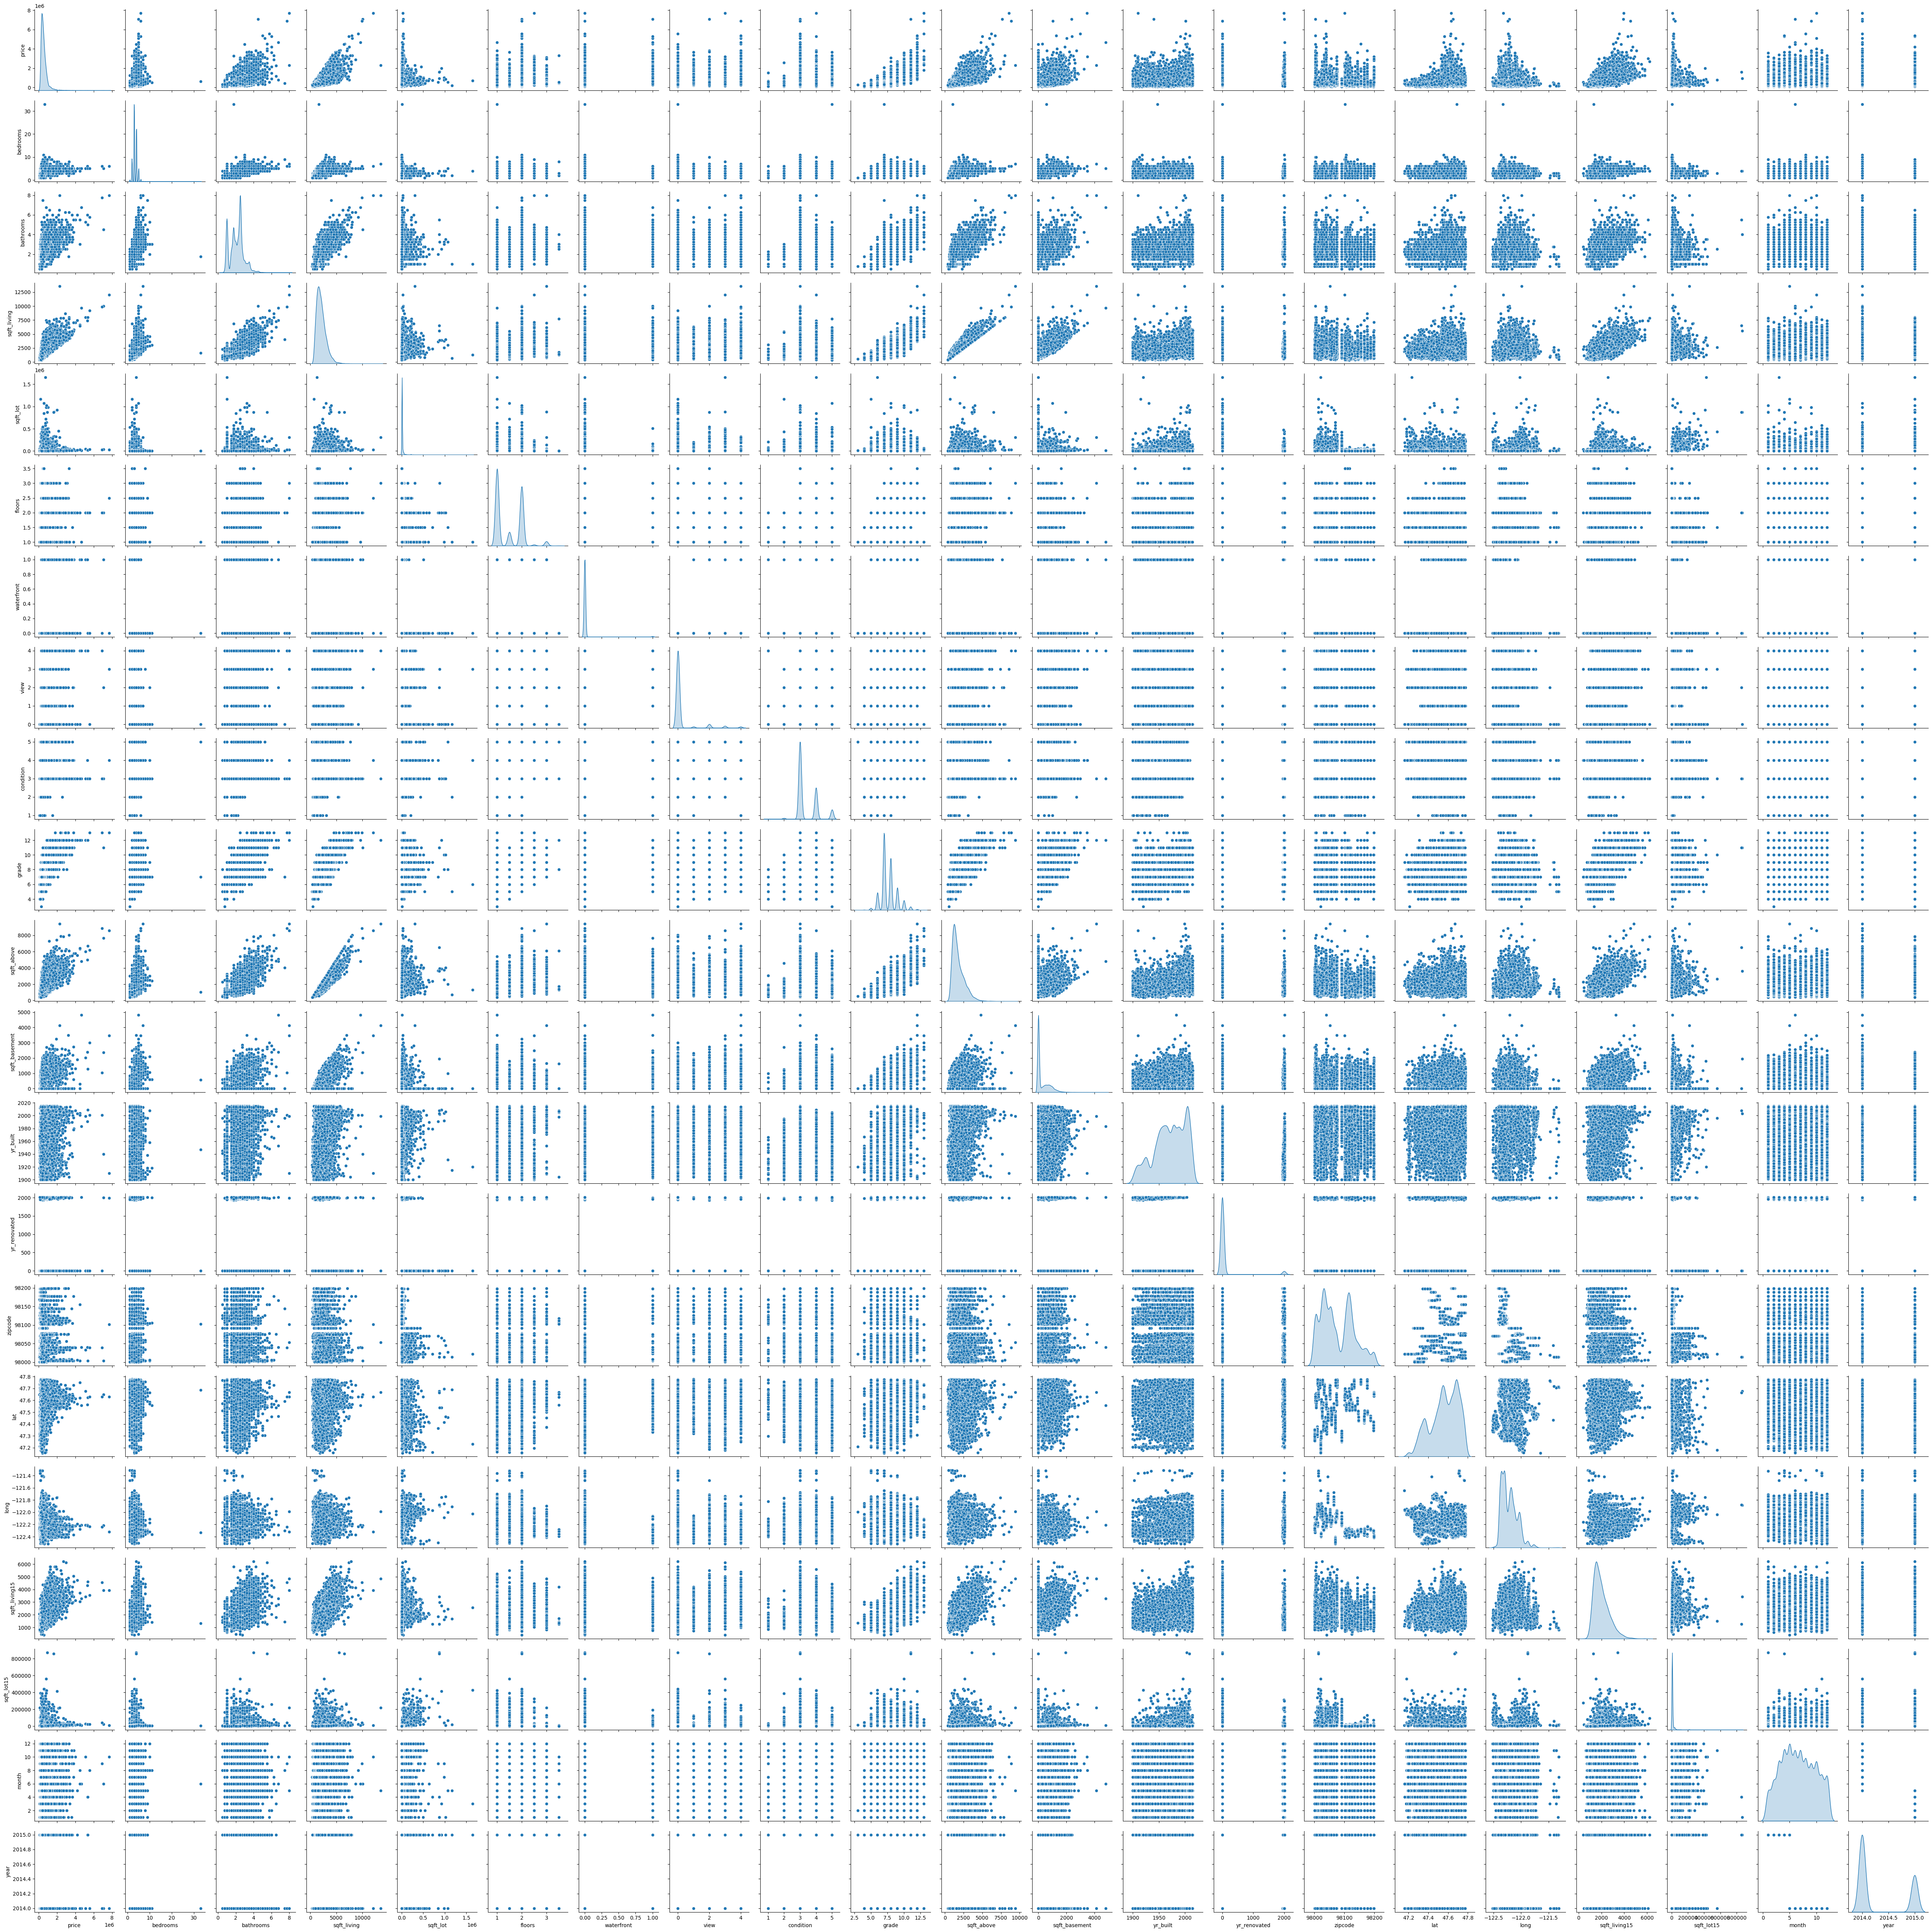

In [18]:
# Menggambar pair plot menggunakan Seaborn dengan estimasi Kernel Density Plot (KDE) pada diagonal
sns.pairplot(house, diag_kind='kde')

Evaluasai Skor Korelasi dengan Fungsi 'corr()'

Text(0.5, 1.0, 'Correlation Matrix untuk tiap fitur')

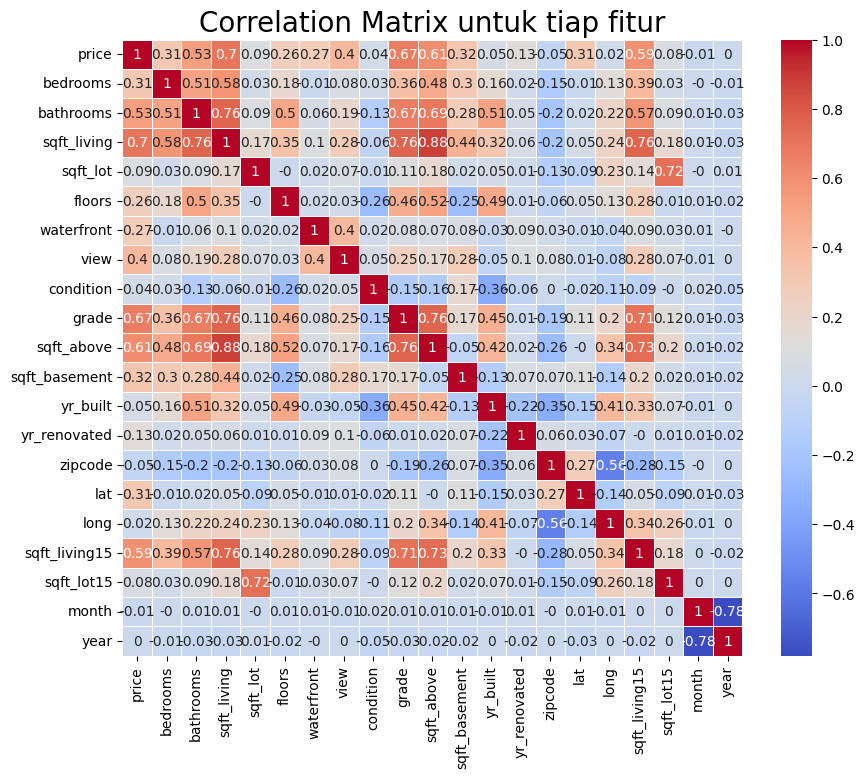

In [19]:
# Membuat gambar plot dengan ukuran 10x8
plt.figure(figsize=(10, 8))

# Menghitung matriks korelasi antar fitur dan membulatkannya ke 2 desimal
correlation_matrix = house.corr().round(2)

# Menggambar heatmap korelasi dengan parameter 'annot=True' untuk menampilkan nilai dalam persegi
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Memberi judul pada plot
plt.title("Correlation Matrix untuk tiap fitur", size=20)


In [20]:
# Memilih fitur-fitur yang akan digunakan sebagai variabel independen (X)
X = house[['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']]

# Memilih variabel dependen (y), yang dalam hal ini adalah 'price'
y = house['price']


In [21]:
# Memisahkan data menjadi data latih dan data uji
# X_train dan y_train adalah data latih, X_test dan y_test adalah data uji
# test_size = 0.1 menunjukkan bahwa 10% dari data akan digunakan sebagai data uji
# random_state digunakan untuk mengontrol randomization agar hasilnya dapat direproduksi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)


In [22]:
print(f'Total # sampel di seluruh dataset: {len(X)}')
print(f'Total # sampel di seluruh dataset: {len(X_train)}')
print(f'Total # sampel di seluruh datasett: {len(X_test)}')

Total # sampel di seluruh dataset: 21597
Total # sampel di seluruh dataset: 19437
Total # sampel di seluruh datasett: 2160


In [23]:
# Mengidentifikasi fitur-fitur numerik yang akan dinormalisasi
numerical_features = ['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']

# Menerapkan StandardScaler untuk melakukan normalisasi pada data latih
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])

# Menampilkan lima baris pertama dari data latih yang telah dinormalisasi
X_train[numerical_features].head()


bathrooms  sqft_living     grade  sqft_above  sqft_living15
2052   -0.476885    -0.393168  0.290273   -0.083773      -0.477134
13755   0.172652     0.280744 -0.561997   -0.698138      -0.026114
10971   0.497420    -0.273603  0.290273   -0.324701       0.163023
15891  -1.451189    -1.164907 -1.414267   -0.939065      -0.869958
14118   0.172652     0.226396  0.290273    0.602869       1.108710

In [24]:
#cek nilai rata-rata (mean) dan standar deviasi (std) setelah di standarisasi
X_train[numerical_features].describe().round(4)

bathrooms  sqft_living       grade  sqft_above  sqft_living15
count  19437.0000   19437.0000  19437.0000  19437.0000     19437.0000
mean      -0.0000       0.0000      0.0000     -0.0000        -0.0000
std        1.0000       1.0000      1.0000      1.0000         1.0000
min       -2.1007      -1.8497     -3.9711     -1.6980        -2.3118
25%       -0.4769      -0.7084     -0.5620     -0.7222        -0.7245
50%        0.1727      -0.1866     -0.5620     -0.2765        -0.2153
75%        0.4974       0.5090      0.2903      0.5065         0.5558
max        7.6423      12.4546      4.5516      9.1799         6.1427

Standarisasi Data Uji

In [25]:
#Scaling data uji
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

Decision Tree

In [26]:
dtr = DecisionTreeRegressor(random_state=42)

In [27]:
# Melatih model Decision Tree Regressor menggunakan data latih
dtr.fit(X_train, y_train)

# Menghitung skor (R-squared) dari model pada data latih
score_dtr = dtr.score(X_train, y_train)

# Menampilkan skor model
print("Skor Decision Tree Regressor pada data latih:", score_dtr)


Skor Decision Tree Regressor pada data latih: 0.9942582610647696


Random Forest Regressor

In [31]:
rfr = RandomForestRegressor(n_estimators=500)

In [32]:
rfr.fit(X_train,y_train)
score_rfr = rfr.score(X_train,y_train)
print(score_rfr)

0.9406056883592582


KNN

In [28]:
# Membuat model K-Nearest Neighbors Regressor dengan 2 tetangga
knr = KNeighborsRegressor(n_neighbors=2)

In [29]:
# Melatih model K-Nearest Neighbors Regressor
knr.fit(X_train, y_train)

# Menghitung dan mencetak skor kesesuaian model terhadap data pelatihan
score_knr = knr.score(X_train, y_train)
print(score_knr)

0.8255312478090555


**EVALUASI MODEL**

In [33]:
# Buat DataFrame untuk menyimpan nilai RMSE
rmse = pd.DataFrame(columns=['train', 'test'], index=['DTR', 'RFR', 'KNR'])

# Dictionary model-model yang akan diuji
model_dict = {'DTR': dtr, 'RFR': rfr, 'KNR': knr}

# Loop melalui setiap model untuk menghitung RMSE pada data pelatihan dan pengujian
for name, model in model_dict.items():
    rmse.loc[name, 'train'] = np.sqrt(mean_squared_error(y_true=y_train, y_pred=model.predict(X_train)) / 1e3)
    rmse.loc[name, 'test'] = np.sqrt(mean_squared_error(y_true=y_test, y_pred=model.predict(X_test)) / 1e3)

# Tampilkan nilai RMSE
rmse


train         test
DTR    883.47378  9460.449604
RFR  2841.478477  7035.152832
KNR    4870.0203   7915.59164

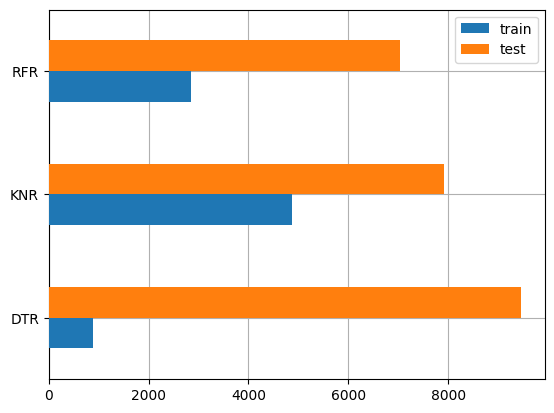

In [34]:
fig, ax = plt.subplots()

# Mengurutkan DataFrame berdasarkan nilai RMSE pada data pengujian dalam urutan menurun
rmse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)

# Menambahkan grid pada plot
ax.grid(zorder=0)


Uji model dengan data test

In [35]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

y_true  prediksi_DTR  prediksi_RFR  prediksi_KNR
21585  270000.0      292500.0      292152.7      284500.0